In [5]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.shape

(891, 15)

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
## Delete the rows or datapoint to handlee missing value
df.dropna().shape

(182, 15)

In [12]:
## Columnwise deletion
df.dropna(axis=1) 

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


C:\Users\user\AppData\Local\Temp\ipykernel_10316\4106589157.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

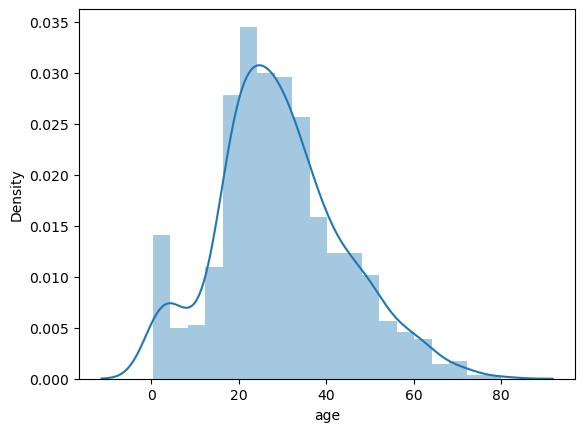

In [15]:
## Imputation of Missing Values
# 1: Mean Value Imputation

sns.distplot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

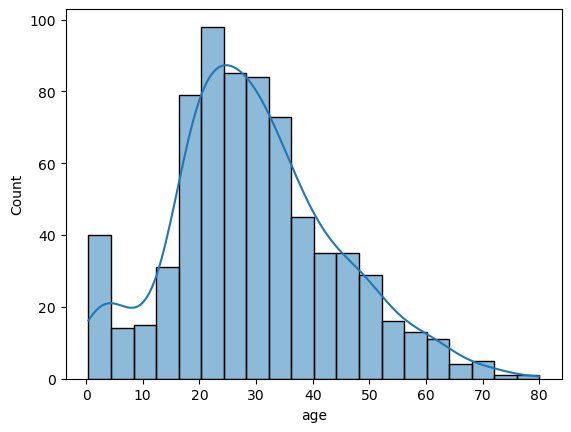

In [16]:
sns.histplot(df['age'],kde=True)

In [18]:
df['Age_Mean']=df['age'].fillna(df['age'].mean())

In [19]:
df[["Age_Mean","age"]]

,Age_Mean,age
0,22.000000,22.000000
1,38.000000,38.000000
2,26.000000,26.000000
3,35.000000,35.000000
4,35.000000,35.000000
...,...,...
886,27.000000,27.000000
887,19.000000,19.000000
888,29.699118,29.699118
889,26.000000,26.000000


In [ ]:
## Mean Imputation works well when we have normally distributed data

In [21]:
## 2. Median Value Imputaion - If we have an outlier in the dataset

df['Age_Median']=df['age'].fillna(df['age'].median)
df[['Age_Median','Age_Mean','age']]

,Age_Median,Age_Mean,age
0,22.000000,22.000000,22.000000
1,38.000000,38.000000,38.000000
2,26.000000,26.000000,26.000000
3,35.000000,35.000000,35.000000
4,35.000000,35.000000,35.000000
...,...,...,...
886,27.000000,27.000000,27.000000
887,19.000000,19.000000,19.000000
888,29.699118,29.699118,29.699118
889,26.000000,26.000000,26.000000


In [23]:
## Mode Imputation Technique - Categorical values

df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_Median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [24]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
mode_values = df[df['embarked'].notna()]['embarked'].mode()[0]

In [45]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [46]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [47]:
df['embarked_mode'].isnull().sum()

0

In [48]:
df['embarked'].isnull().sum()

2